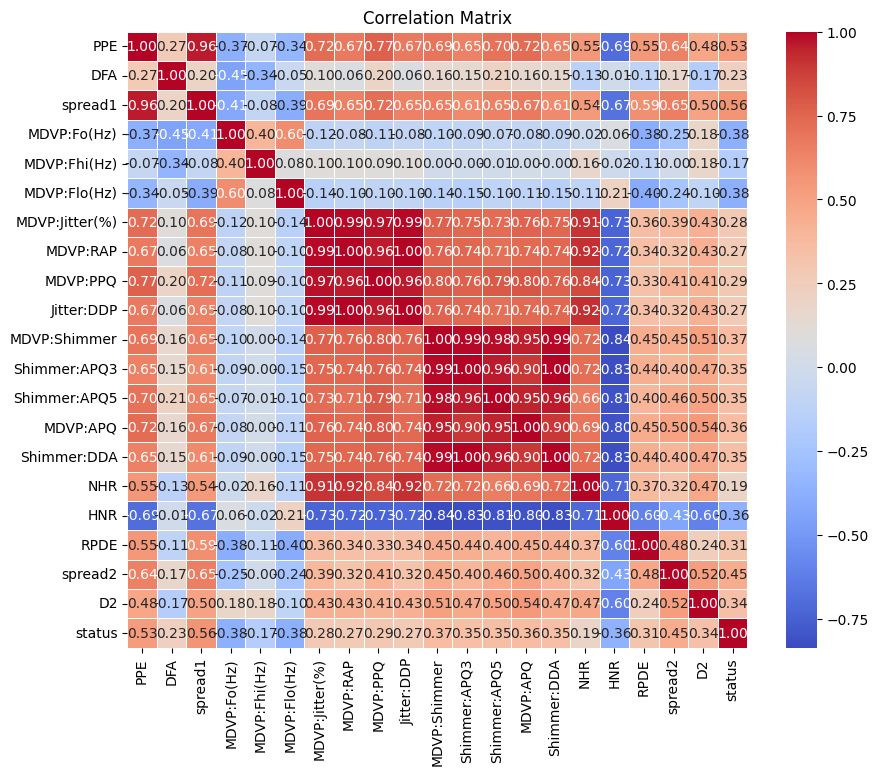

Number of training cases: 117
Number of validation cases: 39
Number of testing cases: 39
Linear Regression Coefficients: [ 0.05460248 -0.04829912  0.003299    0.0023002   0.00318585  0.07912915
  0.0013936  -0.00160932]
Linear Regression - Validation Mean Squared Error (MSE): 0.00074
Linear Regression - Validation R² Score: 0.89
Random Forest - Validation Mean Squared Error (MSE): 0.00058
Random Forest - Validation R² Score: 0.92
Linear Regression - Test Mean Squared Error (MSE): 0.00051
Linear Regression - Test R² Score: 0.91
Random Forest - Test Mean Squared Error (MSE): 0.00037
Random Forest - Test R² Score: 0.94
       Actual  Predicted LR  Predicted RF
172  0.174152      0.174531      0.167650
138  0.209191      0.222301      0.214656
127  0.196535      0.198472      0.178103
82   0.264666      0.259714      0.268527
184  0.252404      0.249990      0.248133
185  0.214346      0.209517      0.211195
118  0.251972      0.242430      0.259362
68   0.185580      0.174613      0.18007

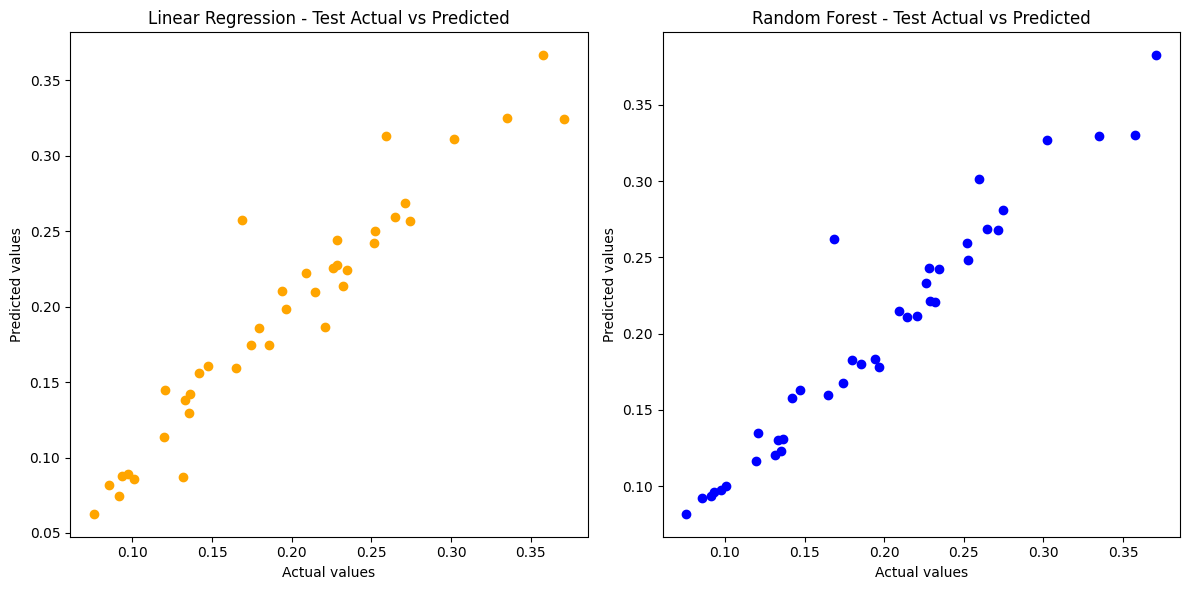

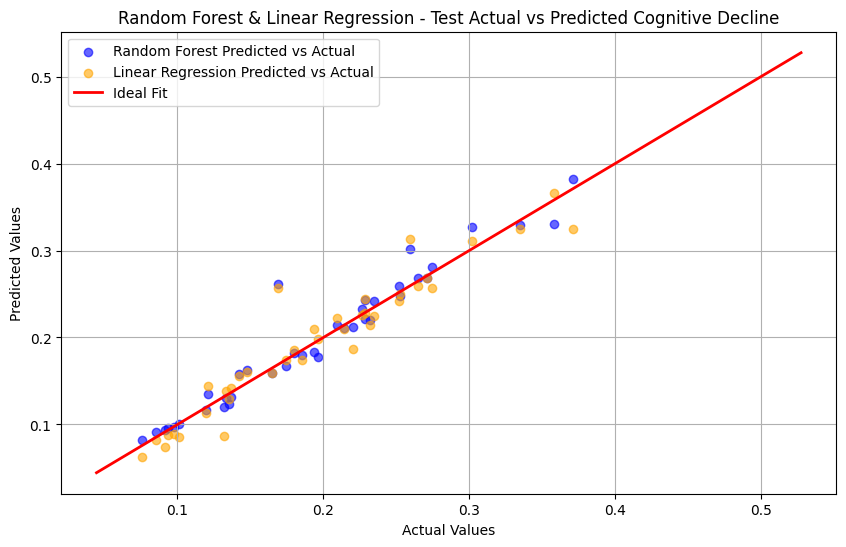

In [150]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/dariapisai/Documents/TIA/parkinsons.csv'
data = pd.read_csv(file_path)

# Compute the correlation matrix
correlations = data[['PPE', 'DFA', 'spread1', "MDVP:Fo(Hz)", 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'spread2', 'D2', 'status']].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Selecting relevant features and the target variable (PPE)
features = [
    "MDVP:PPQ", "MDVP:Jitter(%)", "MDVP:Shimmer", 
    "RPDE", "DFA", "spread1", "spread2", "D2"
]
X = data[features]
y = data["PPE"]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)  # 60% train, 40% remaining
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split remaining 40% into 50% validation and 50% test

# Display the number of training, validation, and testing cases
print(f"Number of training cases: {X_train.shape[0]}")
print(f"Number of validation cases: {X_val.shape[0]}")
print(f"Number of testing cases: {X_test.shape[0]}")

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Displaying the coefficients of the Linear Regression model
print(f"Linear Regression Coefficients: {lr_model.coef_}")

# Making predictions on the validation set with Linear Regression
y_pred_lr_val = lr_model.predict(X_val)

# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the validation set with Random Forest
y_pred_rf_val = rf_model.predict(X_val)

# Evaluating Linear Regression Model on the validation set
mse_lr_val = mean_squared_error(y_val, y_pred_lr_val)
r2_lr_val = r2_score(y_val, y_pred_lr_val)

# Evaluating Random Forest Model on the validation set
mse_rf_val = mean_squared_error(y_val, y_pred_rf_val)
r2_rf_val = r2_score(y_val, y_pred_rf_val)

# Display the evaluation metrics for both models on the validation set
print(f"Linear Regression - Validation Mean Squared Error (MSE): {mse_lr_val:.5f}")
print(f"Linear Regression - Validation R² Score: {r2_lr_val:.2f}")
print(f"Random Forest - Validation Mean Squared Error (MSE): {mse_rf_val:.5f}")
print(f"Random Forest - Validation R² Score: {r2_rf_val:.2f}")

# Now, we can use the test set for final evaluation

# Making predictions on the test set with both models
y_pred_lr_test = lr_model.predict(X_test)
y_pred_rf_test = rf_model.predict(X_test)

# Evaluating Linear Regression Model on the test set
mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)
r2_lr_test = r2_score(y_test, y_pred_lr_test)

# Evaluating Random Forest Model on the test set
mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)

# Display the evaluation metrics for both models on the test set
print(f"Linear Regression - Test Mean Squared Error (MSE): {mse_lr_test:.5f}")
print(f"Linear Regression - Test R² Score: {r2_lr_test:.2f}")
print(f"Random Forest - Test Mean Squared Error (MSE): {mse_rf_test:.5f}")
print(f"Random Forest - Test R² Score: {r2_rf_test:.2f}")

# Create a DataFrame to compare actual vs predicted values for both models on the test set
results_test = pd.DataFrame({
    'Actual': y_test,
    'Predicted LR': y_pred_lr_test,
    'Predicted RF': y_pred_rf_test
})

# Display the DataFrame
print(results_test)

# Plotting Actual vs Predicted for both models on the test set
plt.figure(figsize=(12, 6))

# Plotting Linear Regression predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr_test, color='orange')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression - Test Actual vs Predicted')

# Plotting Random Forest predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf_test, color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest - Test Actual vs Predicted')

plt.tight_layout()
plt.show()

# Visualization for Random Forest and Linear Regression Model on the test set
plt.figure(figsize=(10, 6))

# Plotting Random Forest predictions
plt.scatter(y_test, y_pred_rf_test, color='blue', label="Random Forest Predicted vs Actual", alpha=0.6)

# Plotting Linear Regression predictions
plt.scatter(y_test, y_pred_lr_test, color='orange', label="Linear Regression Predicted vs Actual", alpha=0.6)

# Ideal Fit (Red line)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label="Ideal Fit")

plt.title("Random Forest & Linear Regression - Test Actual vs Predicted Cognitive Decline")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()
